In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import Model
import keras
from tensorflow.keras.layers import Input, Dense

In [ ]:
from keras.datasets import mnist
(xtrain, ytrain), (xtest,ytest) = keras.datasets.mnist.load_data()
size = xtrain.shape[1] * xtrain.shape[2]
xtrain = xtrain.reshape(xtrain.shape[0], size)
xtest = xtest.reshape(xtest.shape[0], size)
xtrain = xtrain.astype('float32')/255.0
xtest=xtest.astype('float32')/255.0

Noise Factor= 0.1


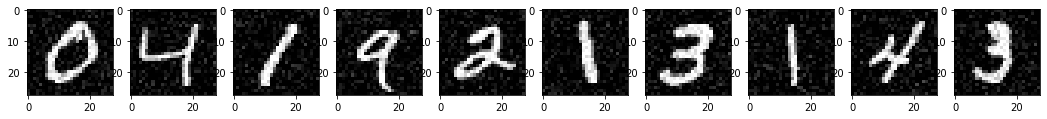

Epoch 1/10
469/469 [==============================] - 6s 5ms/step - loss: 0.2271 - val_loss: 0.1590
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1382 - val_loss: 0.1203
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1137 - val_loss: 0.1060
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1045 - val_loss: 0.1005
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1005 - val_loss: 0.0979
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0987 - val_loss: 0.0967
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0978 - val_loss: 0.0960
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0972 - val_loss: 0.0955
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0967 - val_loss: 0.0953
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0964 - val_loss: 0.0950

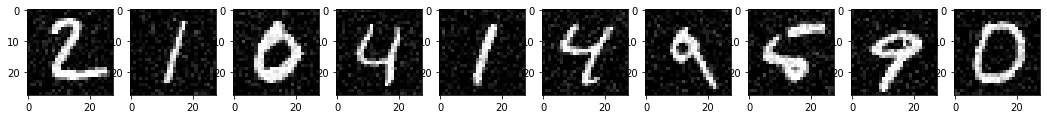

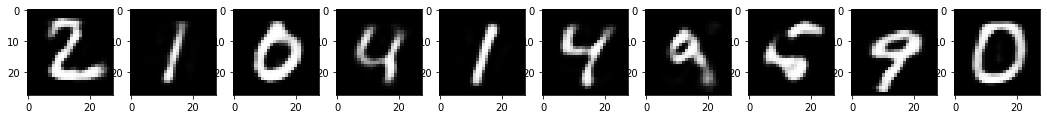

Noise Factor= 1.0


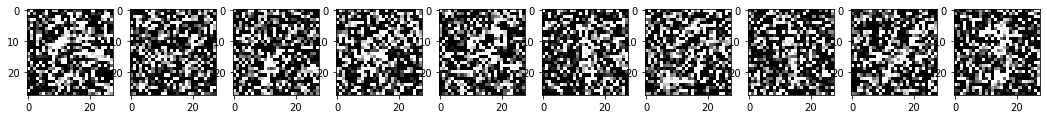

Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 0.2656 - val_loss: 0.2233
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2088 - val_loss: 0.1993
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1957 - val_loss: 0.1909
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1889 - val_loss: 0.1855
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1844 - val_loss: 0.1819
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1815 - val_loss: 0.1801
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1801 - val_loss: 0.1795
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1793 - val_loss: 0.1785
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1788 - val_loss: 0.1784
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1784 - val_loss: 0.1779

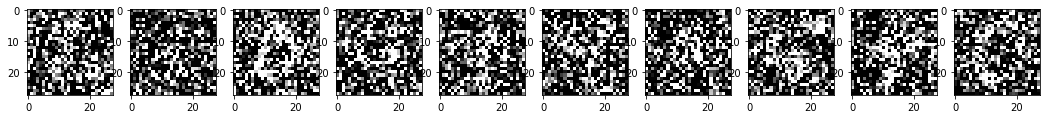

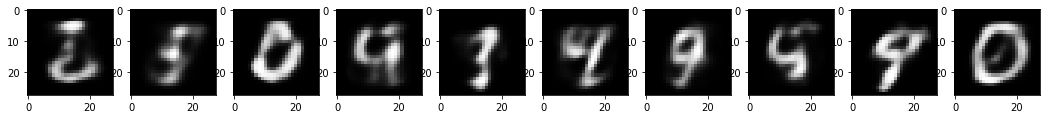

In [ ]:
noise_factor=[0.1,1.0]
for i in range(len(noise_factor)):
      print("Noise Factor=",noise_factor[i])
      xtrainnois = xtrain + np.random.randn(*xtrain.shape) * noise_factor[i] 
      xtrainnois = xtrainnois.clip(0.0, 1.0) 
      xtestnois = xtest + np.random.randn(*xtest.shape) * noise_factor[i] 
      xtestnois = xtestnois.clip(0.0, 1.0) 
      plt.figure(figsize=(20, 2))
      for i in range(1,11):
          plot = plt.subplot(1, 11, i)
          fig=xtrainnois[i].reshape(28, 28)
          plt.imshow(fig,cmap="gray")
      plt.show()
      imageinput = Input(shape=(784,))
      x = Dense(32,activation='relu')(imageinput)
      y = Dense(784, activation='sigmoid')(x)

      encoder = Model(imageinput, y)
      encoder.compile(optimizer='adam', loss='binary_crossentropy')
      encoder.fit(xtrainnois, xtrain,epochs=10,batch_size=128,validation_data=(xtestnois, xtest))

      d = encoder.predict(xtestnois)
      plt.figure(figsize=(20, 4))
      for i in range(1,11):
          ax = plt.subplot(2, 11, i+1)
          plt.imshow(xtestnois[i].reshape(28, 28), cmap='gray')
      plt.show()
      plt.figure(figsize=(20, 4))
      for i in range(1,11):
          ax1 = plt.subplot(2, 11, i+1)
          plt.imshow(d[i].reshape(28, 28), cmap='gray')
      plt.show()

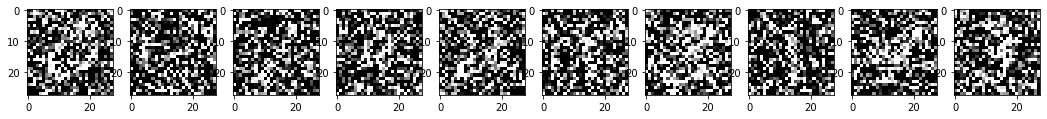

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.2578 - val_loss: 0.2138
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2057 - val_loss: 0.1984
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1964 - val_loss: 0.1921
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1909 - val_loss: 0.1881
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1875 - val_loss: 0.1853
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1843 - val_loss: 0.1818
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1811 - val_loss: 0.1790
Epoch 8/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1789 - val_loss: 0.1778
Epoch 9/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1772 - val_loss: 0.1765
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1760 - val_loss: 0.1753

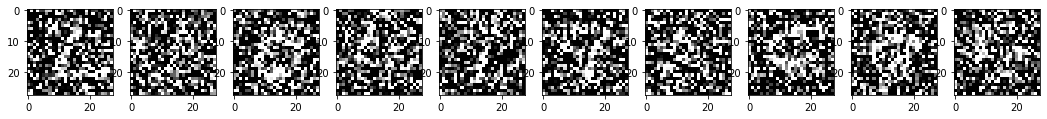

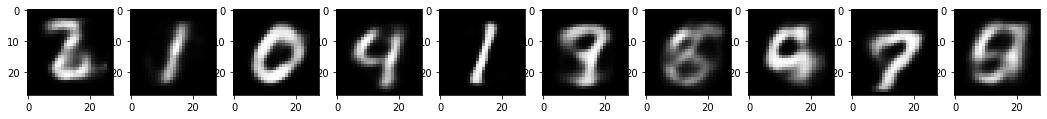

In [ ]:
noise_factor=1
xtrainnois = xtrain + np.random.randn(*xtrain.shape) * noise_factor 
xtrainnois = xtrainnois.clip(0.0, 1.0) 
xtestnois = xtest + np.random.randn(*xtest.shape) * noise_factor 
xtestnois = xtestnois.clip(0.0, 1.0) 
plt.figure(figsize=(20, 2))
for i in range(1,11):
    plot = plt.subplot(1, 11, i)
    fig=xtrainnois[i].reshape(28, 28)
    plt.imshow(fig,cmap="gray")
plt.show()



imageinput = Input(shape=(784,))
e1 = Dense(64,activation='relu')(imageinput)
e2 = Dense(32,activation='relu')(e1)
e = Dense(64,activation='relu')(e2)
d = Dense(784, activation='sigmoid')(e)

autoencoder = Model(imageinput, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(xtrainnois, xtrain,epochs=20,batch_size=128,validation_data=(xtestnois, xtest))

decode = autoencoder.predict(xtestnois)
plt.figure(figsize=(20, 4))
for i in range(1,11):
    ax = plt.subplot(2, 11, i+1)
    plt.imshow(xtestnois[i].reshape(28, 28), cmap='gray')
plt.show()
plt.figure(figsize=(20, 4))
for i in range(1,11):
    ax1 = plt.subplot(2, 11, i+1)
    plt.imshow(decode[i].reshape(28, 28), cmap='gray')
plt.show()

**Comments:**

1) In the case of noise factor equal to 0.1 then the autoencoder was in a position to get the correct prediction as the noise factor applied was small.

2)In the case of noise factor equal to 1.0 with the 784 x 32 x 784 autoencoder network then the autoencoder was in a position to get the wrong  predictions of numbers "2,1,4" as the noise factor applied was large to the model and failing to give correct predictions and generating some random shapes and numbers.

3)In the case of noise factor equal to 1.0 with the 784 x 64 x 32 x 64 x 784 autoencoder network with the epoch=20,then the autoencoder was in a position to get the most of the righ predictions and wrong  predictions of numbers "5,9" .
with the updated size and maximum epoch we are able to predict the most of the numbers and the losses were also improved.